In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

In [12]:
cancer_df = pd.read_csv('./input/kag_risk_factors_cervical_cancer.csv')
cancer_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [13]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [14]:
## dropping two columns of STDs as it does not give much information because of missing data

cancer_df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)

In [15]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

In [16]:
cancer_df = cancer_df.replace('?', np.NaN)

In [45]:
### Filling the missing values of numeric data columns with mean of the column data.
for feature in numerical_df:
    print(feature,'',cancer_df[feature].convert_objects(convert_numeric=True).mean())
    feature_mean = round(cancer_df[feature].convert_objects(convert_numeric=True).mean(),1)
    cancer_df[feature] = cancer_df[feature].fillna(feature_mean)
    

AttributeError: 'Series' object has no attribute 'convert_objects'

In [18]:
for feature in categorical_df:
    
    cancer_df[feature] = cancer_df[feature].convert_objects(convert_numeric=True).fillna(1.0)

AttributeError: 'Series' object has no attribute 'convert_objects'

In [19]:
category_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

c:\users\cw\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\cw\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\cw\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplo

c:\users\cw\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\cw\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\cw\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplo

c:\users\cw\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\cw\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


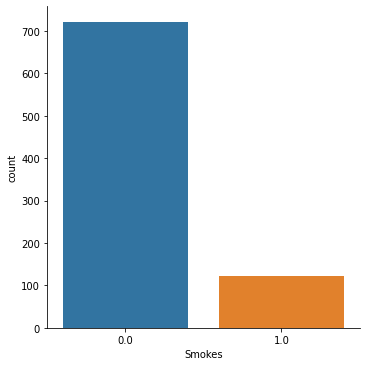

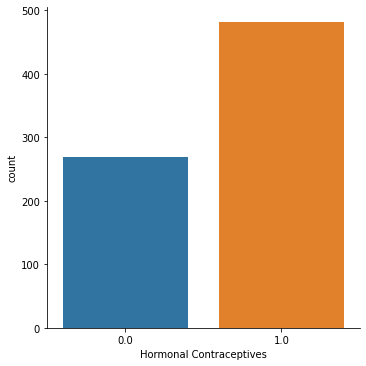

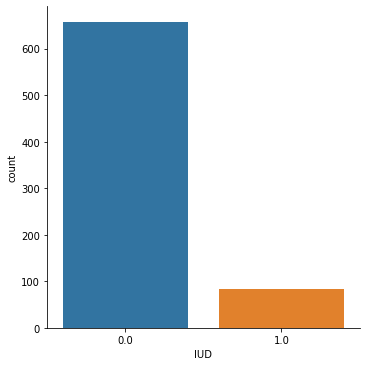

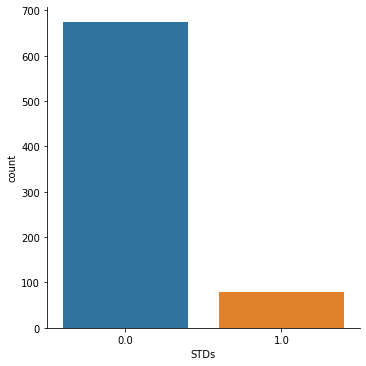

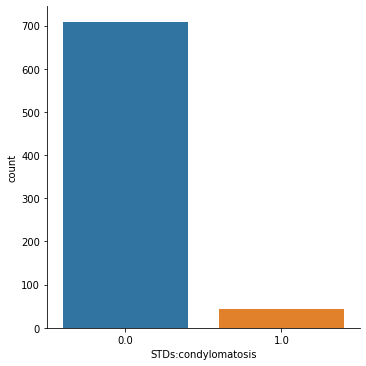

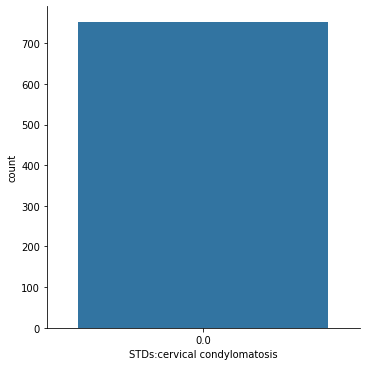

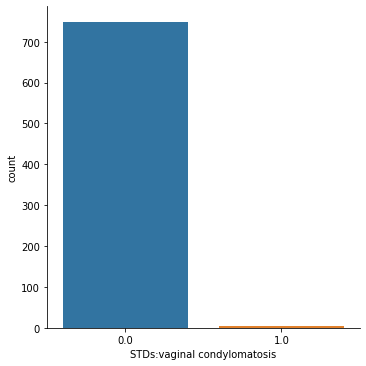

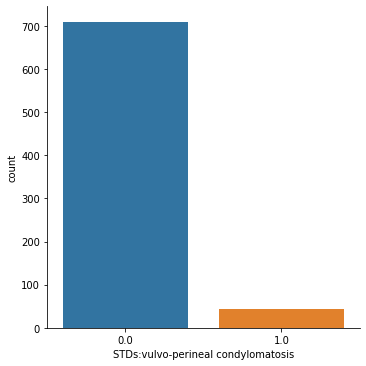

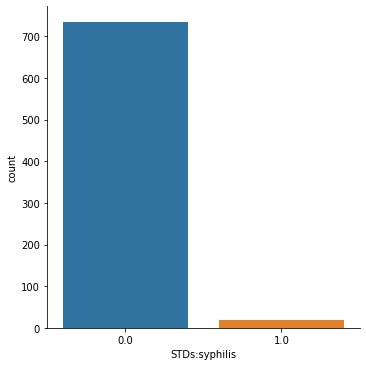

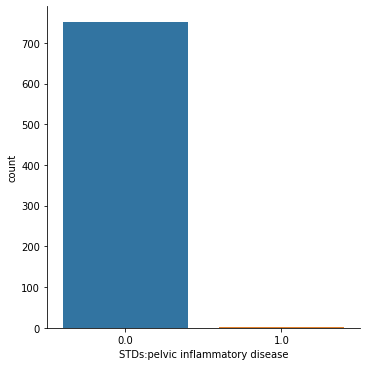

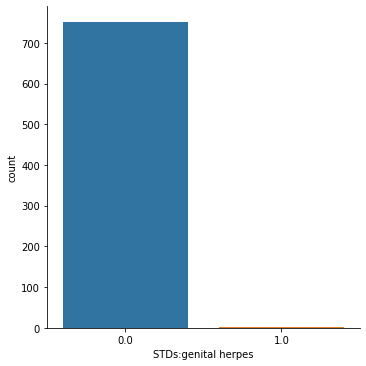

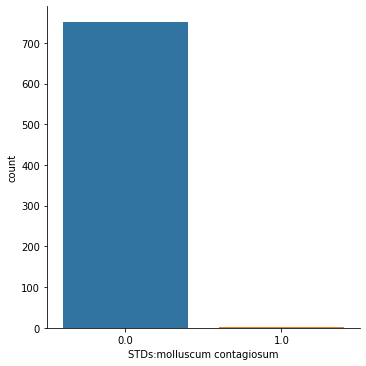

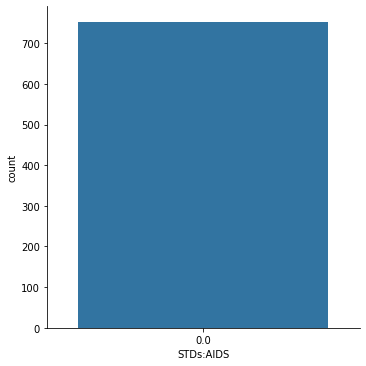

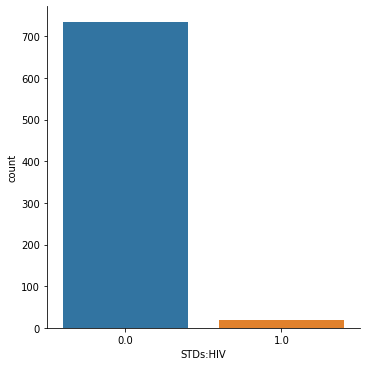

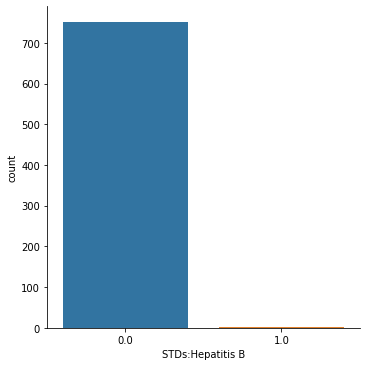

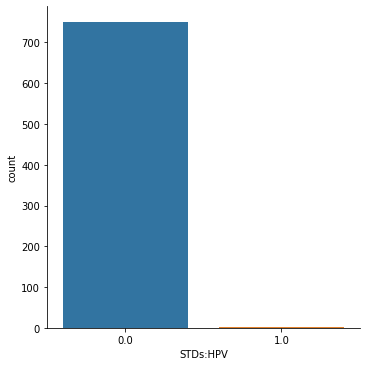

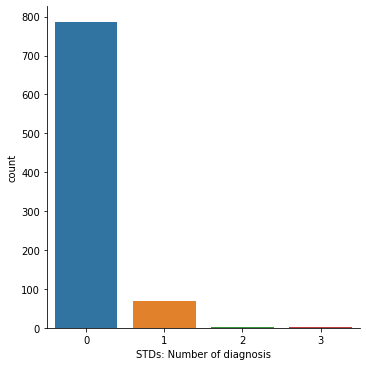

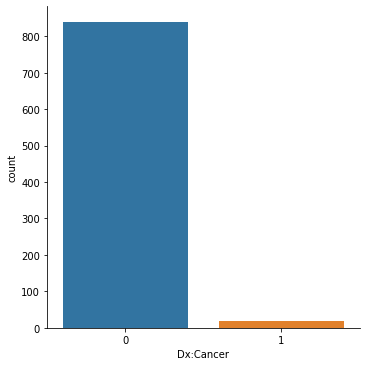

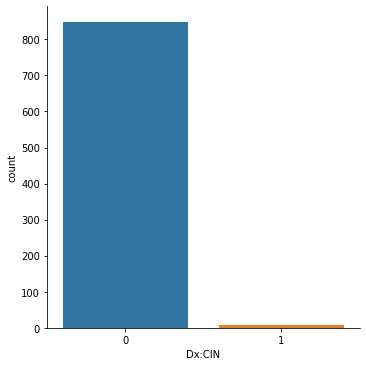

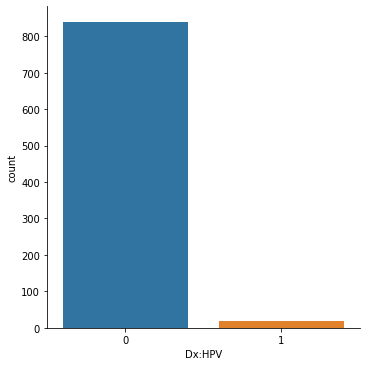

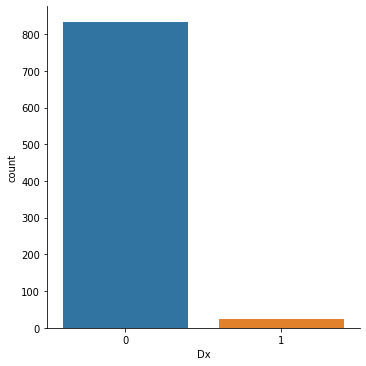

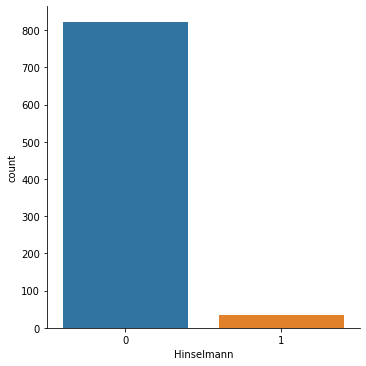

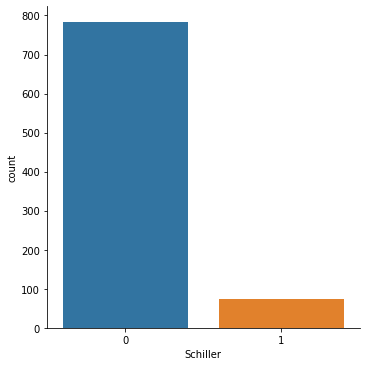

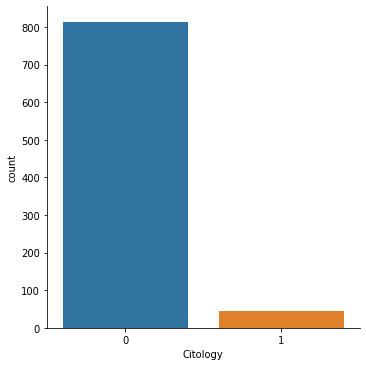

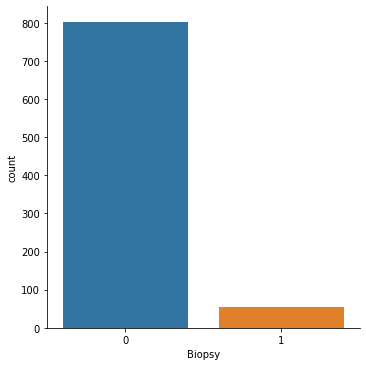

In [20]:
for feature in categorical_df:
   sns.factorplot(feature,data=cancer_df,kind='count')



From the above graphs it can be seen that Harmonal Contraceptive column has the highest number of one's which indicate that this might be the important key feature in detecting the cervical cancer. So let us concentrate on this feature more in future analysis.

c:\users\cw\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


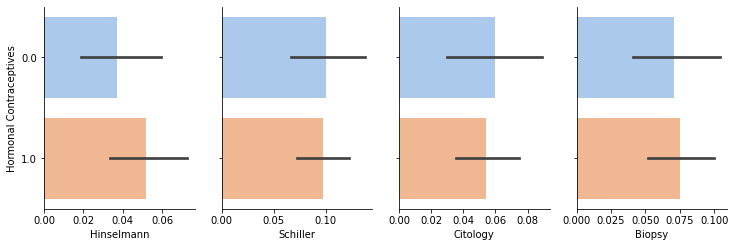

In [21]:
g = sns.PairGrid(cancer_df,
                 y_vars=['Hormonal Contraceptives'],
                 x_vars= category_df,
                 aspect=.75, size=3.5)
g.map(sns.barplot, palette="pastel");

In [22]:
cancer_df['Number of sexual partners'] = round(cancer_df['Number of sexual partners'].convert_objects(convert_numeric=True))
cancer_df['First sexual intercourse'] = cancer_df['First sexual intercourse'].convert_objects(convert_numeric=True)
cancer_df['Num of pregnancies']=round(cancer_df['Num of pregnancies'].convert_objects(convert_numeric=True))
cancer_df['Smokes'] = cancer_df['Smokes'].convert_objects(convert_numeric=True)
cancer_df['Smokes (years)'] = cancer_df['Smokes (years)'].convert_objects(convert_numeric=True)
cancer_df['Hormonal Contraceptives'] = cancer_df['Hormonal Contraceptives'].convert_objects(convert_numeric=True)
cancer_df['Hormonal Contraceptives (years)'] = cancer_df['Hormonal Contraceptives (years)'].convert_objects(convert_numeric=True)
cancer_df['IUD (years)'] = cancer_df['IUD (years)'].convert_objects(convert_numeric=True)

print('minimum:',min(cancer_df['Hormonal Contraceptives (years)']))
print('maximum:',max(cancer_df['Hormonal Contraceptives (years)']))

AttributeError: 'Series' object has no attribute 'convert_objects'

Mean age of the Women facing the risk of Cervical cancer 26.82051282051282


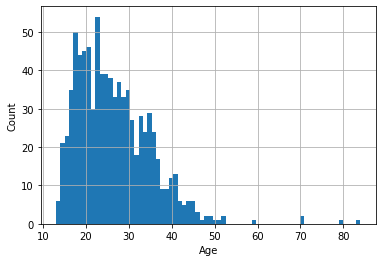

In [23]:
cancer_df['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Count')
print('Mean age of the Women facing the risk of Cervical cancer',cancer_df['Age'].mean())

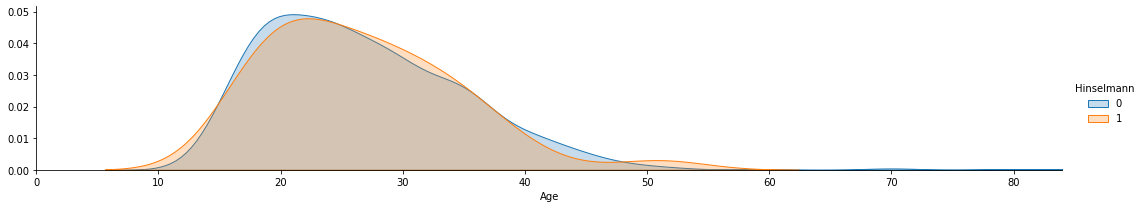

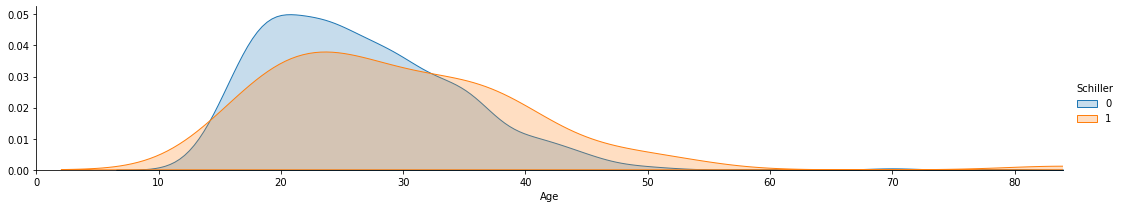

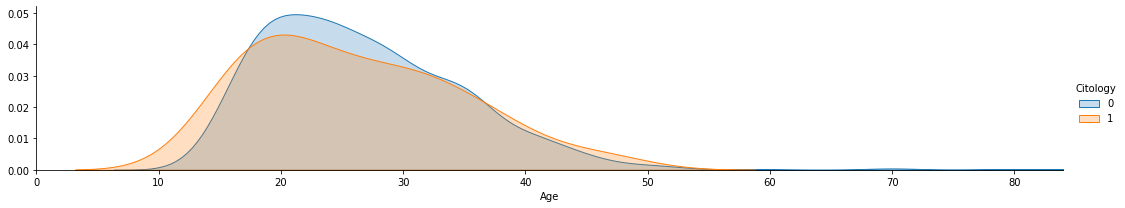

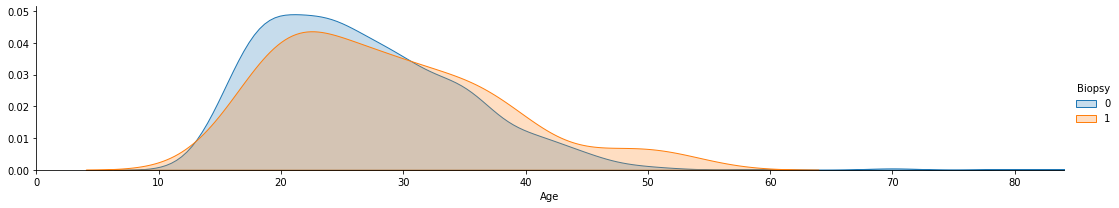

In [24]:
for feature in category_df:

 as_fig = sns.FacetGrid(cancer_df,hue=feature,aspect=5)

 as_fig.map(sns.kdeplot,'Age',shade=True)

 oldest = cancer_df['Age'].max()

 as_fig.set(xlim=(0,oldest))

 as_fig.add_legend()

From the above plots it can be seen that the mean age of the women facing the risk of cervicakl cancer is 26. Also the women with the age in range of 20 to 35 have the highest chances of developing the risk of cervical cancer. The peaks at age of 50 and the furthur extension of the density plot indicate that some of the women face the risk of cervical cancer even at that age.

c:\users\cw\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\cw\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\cw\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind`

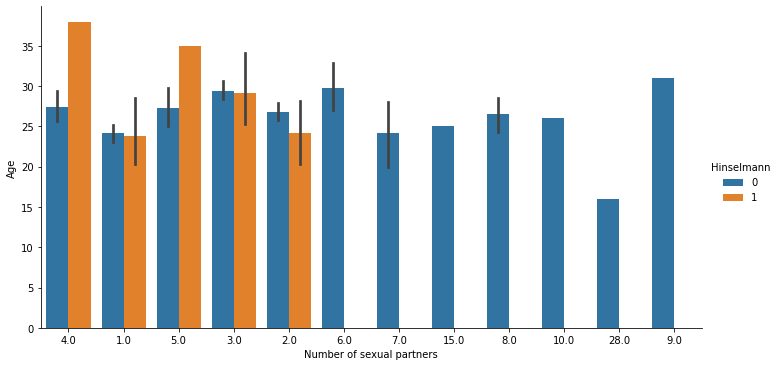

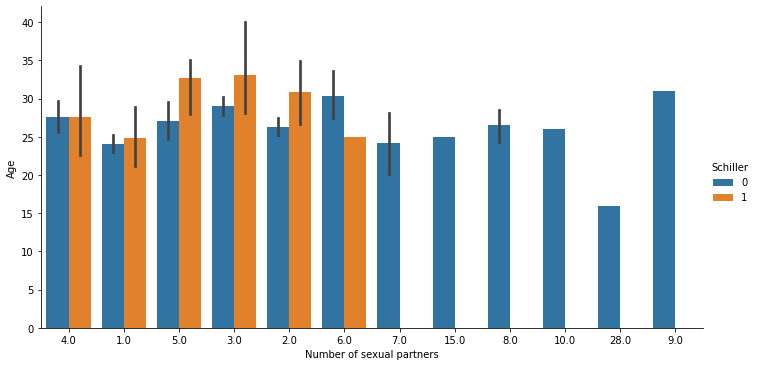

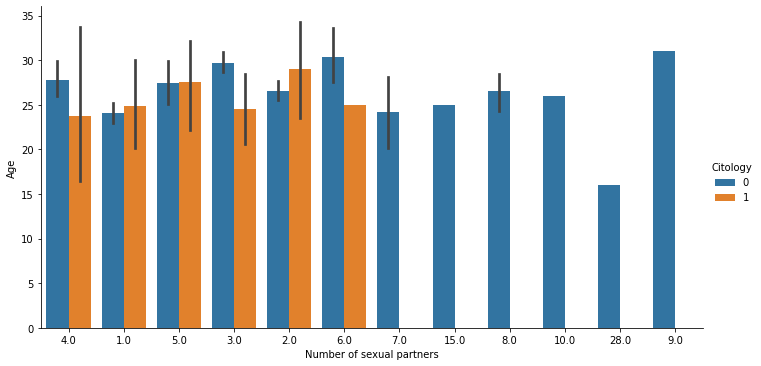

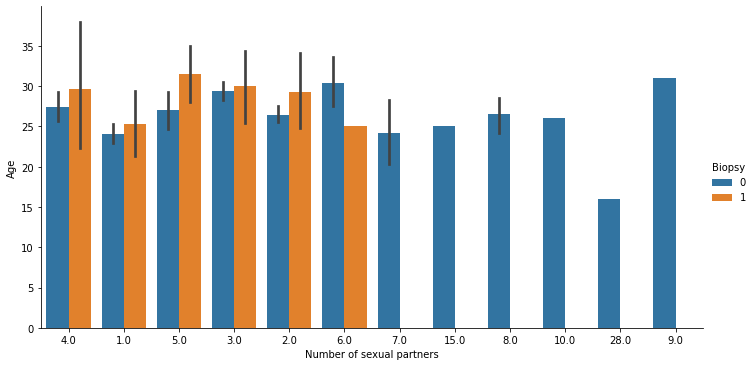

In [25]:
for feature in category_df:
  
  sns.factorplot(x='Number of sexual partners',y='Age',hue=feature,data=cancer_df,aspect=1.95,kind='bar');

As age of women increases, the number of sexual partners increases which increases the possibility of getting tumor. So we can consider that Number of Sexual partners as a key feature in detecting the Cervical Cancer. Even the resources here: https://www.mayoclinic.org/diseases-conditions/cervical-cancer/symptoms-causes/syc-20352501 supports this statement.

In [26]:
sns.distplot(cancer_df['First sexual intercourse'].convert_objects(convert_numeric=True))
#print('Mean age of the women who started the sexual intercourse',cancer_df['First sexual intercourse'].mean())

AttributeError: 'Series' object has no attribute 'convert_objects'

Dist plot gives an intuition that most of the women started first sexual intercourse between the age 15 to 20. 

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

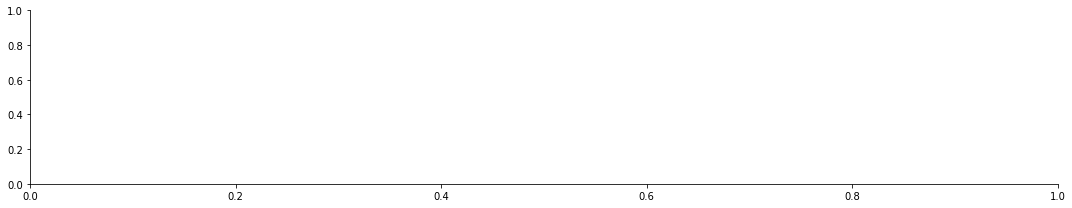

In [27]:

for feature in category_df:

 as_fig = sns.FacetGrid(cancer_df,hue=feature,aspect=5)

 as_fig.map(sns.kdeplot,'First sexual intercourse',shade=True)

 oldest = cancer_df['First sexual intercourse'].max()

 as_fig.set(xlim=(0,oldest))

 as_fig.add_legend()

The density plots shows that the women who started the Sexual intercourse at the age of 15 to 20 are having the high chances of risk. Please refer to the resources here for supporting the statement: https://www.mayoclinic.org/diseases-conditions/cervical-cancer/symptoms-causes/syc-20352501 
So we can consider even this as the key feature in detecting the Cervical cancer.

In [28]:
preg_table = pd.crosstab(index=cancer_df["Hinselmann"], 
                          columns=(cancer_df["Num of pregnancies"],cancer_df['Number of sexual partners']))

preg_table

TypeError: can only concatenate list (not "tuple") to list

NameError: name 'preg_table' is not defined

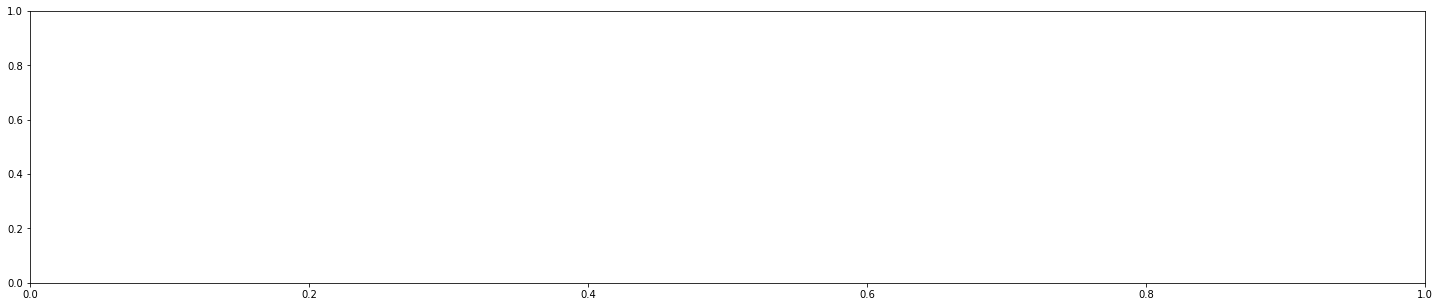

In [29]:
fig, ax = plt.subplots(figsize=(25,5))  
sns.heatmap(preg_table,annot=True, fmt="d",cmap="Blues_r",linewidths=0.5,ax=ax)

Data is analyzed against the number of pregnancies and the number of sexual partners. It is found that 4% of the women having number of sexual partners greater than 2 with number of pregnancies greater than 3 are facing the risk of cancer. The above is the chart for number of women facing the risk.

In [30]:
##### Just checking to see if there is any relation between number of pregnancies and number of sexual partners
cancer_df['Number of sexual partners'].corr(cancer_df['Num of pregnancies'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [31]:

cancer_df['Smokes (packs/year)'] = cancer_df['Smokes (packs/year)'].convert_objects(convert_numeric=True)
print('Correlation between Smokes and Smokes (years) feature:',cancer_df['Smokes'].corr(cancer_df['Smokes (years)']))
print('Correlation between Smokes and Smokes (packs/year) feature:',cancer_df['Smokes'].corr(cancer_df['Smokes (packs/year)']))

AttributeError: 'Series' object has no attribute 'convert_objects'






From the three columns/features (Smokes, Smokes (years), Smokes (packs/year)) we can remove the column Smokes because Smokes (years) will represent the Smokes column because Smoke (years) column has non-zero value only when Smokes column has non-zero value. Also, the predictions depends on the number of years the person is smoking rather than just whether the smokes or not.

In [32]:
## removing the smokes column from the dataframe.

cancer_df.drop('Smokes',axis=1,inplace=True)

In [33]:
smokes_table = pd.crosstab(index=cancer_df["Schiller"], 
                          columns=(cancer_df["Smokes (years)"]))

c:\users\cw\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
c:\users\cw\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


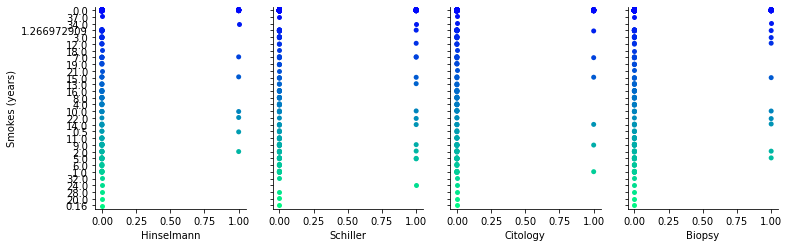

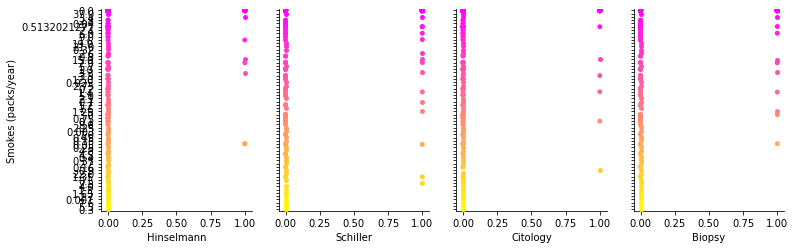

In [34]:
g = sns.PairGrid(cancer_df,
                 y_vars=['Smokes (years)'],
                 x_vars= category_df,
                 aspect=.75, size=3.5)
g.map(sns.stripplot, palette="winter");

g = sns.PairGrid(cancer_df,
                 y_vars=['Smokes (packs/year)'],
                 x_vars= category_df,
                 aspect=.75, size=3.5)
g.map(sns.stripplot, palette="spring");

Based on the distribution of data points in the scatter plot, the schiller and Biopsy tests are showing that women who are smoking for more than 5 years are having more chances of getting the tumor.

In [35]:
#### Similar study as Smokes can be conducted for other features like Harmonal Contraceptives etc.


cancer_df.drop('Hormonal Contraceptives',axis=1,inplace=True)

In [36]:
harmones_table = pd.crosstab(index=cancer_df["Schiller"], 
                          columns=(cancer_df["Hormonal Contraceptives (years)"]))


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

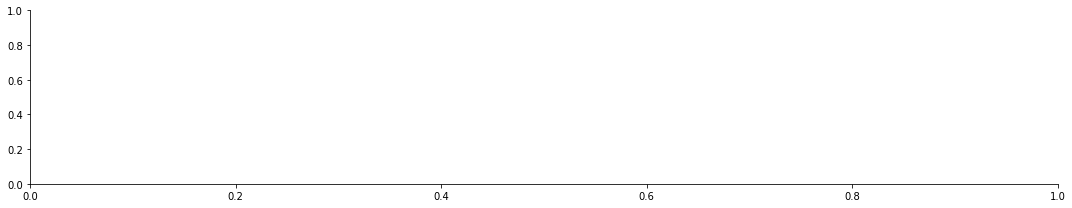

In [38]:
for feature in category_df:

 as_fig = sns.FacetGrid(cancer_df,hue=feature,aspect=5)

 as_fig.map(sns.kdeplot,'Hormonal Contraceptives (years)',shade=True)

 oldest = cancer_df['Hormonal Contraceptives (years)'].max()

 as_fig.set(xlim=(0,oldest))

 as_fig.add_legend()

Women who have taken the harmonal contraceptives for more than five years have the higher risk of cervical cancer. The small peaks at the age 10 & 15 shows even higher risk than women who have not used the contraceptives. The resources here: https://www.cancer.gov/about-cancer/causes-prevention/risk/hormones/oral-contraceptives-fact-sheet#q6 shows the studies supporting the statement that women face higher risk of cervical cancer if they used harmonal contraceptives. So, we can consider that this feature has the high correlation and should be used in furthur analysis.

In [39]:
### Dropping IUD column because IUD (years) has a non-zero value only if IUD is non-zero.

cancer_df.drop('IUD',axis=1,inplace=True)

c:\users\cw\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\cw\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


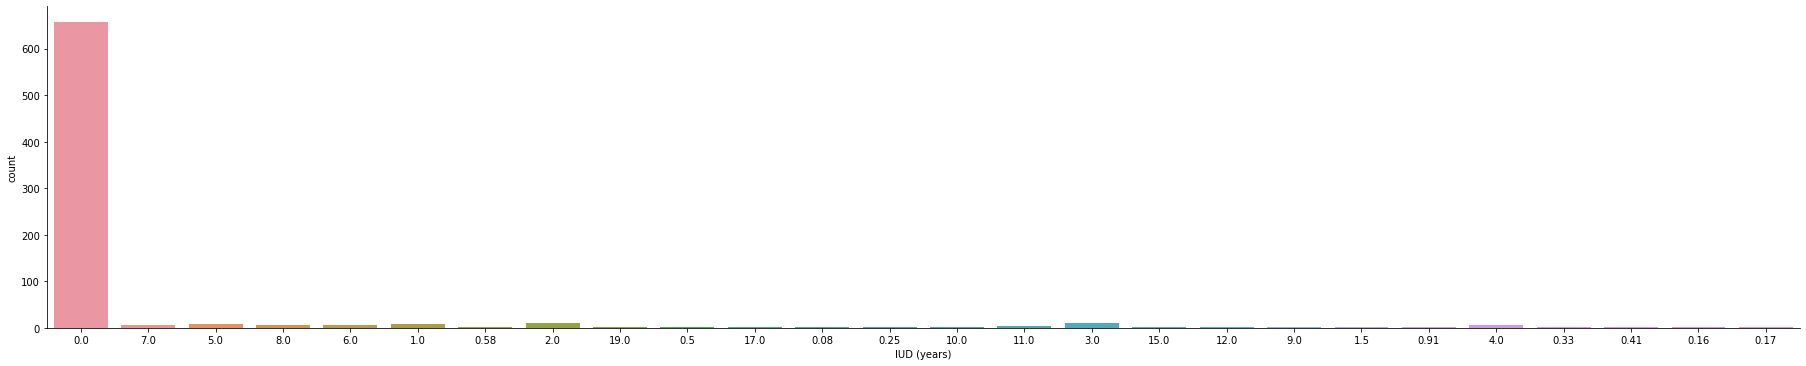

In [40]:

sns.factorplot('IUD (years)',data=cancer_df,kind='count',aspect=5)

c:\users\cw\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


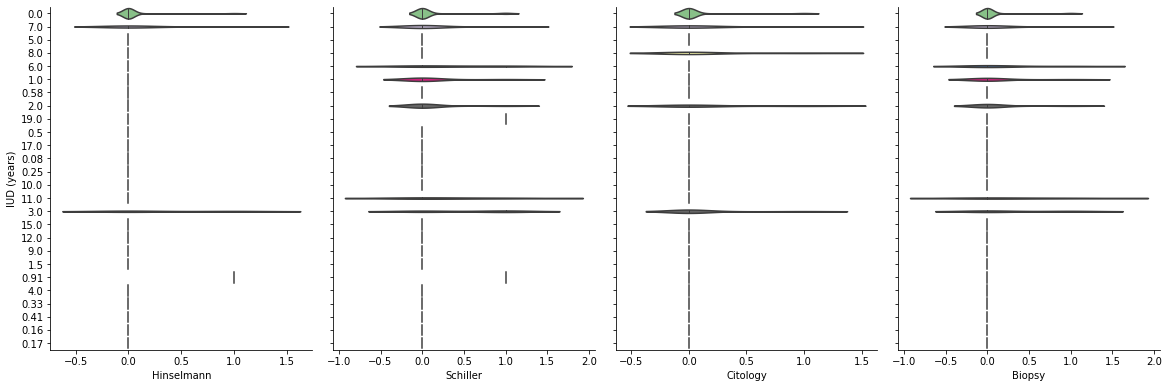

In [41]:
g = sns.PairGrid(cancer_df,
                 y_vars=['IUD (years)'],
                 x_vars= category_df,
                 aspect=.75, size=5.5)
g.map(sns.violinplot, palette="Accent",inner='stick');

The distribution of zero(negative test result) shows that the IUD used for any number of years has less chance of facing risk of cancer. Latest studies says that Women Who Use IUDs May Have Lower Risk of Cervical Cancer. Resource: https://www.livescience.com/60881-iuds-may-lower-risk-of-cervical-cancer.html. So does the presence of IUD feature makes any difference in prediction? lets see!!

In [42]:
HU_table = pd.crosstab(index=cancer_df["Biopsy"], 
                          columns=(cancer_df["IUD (years)"]))


In [43]:
cancer_df['STDs (number)'] = round(cancer_df['STDs (number)'].convert_objects(convert_numeric=True))
sns.countplot('STDs (number)',data=cancer_df)

AttributeError: 'Series' object has no attribute 'convert_objects'

In [ ]:
sns.stripplot(x='Hinselmann',y='STDs (number)',data=cancer_df)

In [ ]:
std_table = pd.crosstab(index=cancer_df["Hinselmann"], 
                          columns=cancer_df["STDs (number)"])

std_table

In [ ]:
sns.heatmap(std_table,annot=True, fmt="d",cmap="YlGnBu",linewidths=0.5)

In [ ]:
std_table_cit = pd.crosstab(index=cancer_df["Citology"], 
                          columns=cancer_df["STDs (number)"])

std_table_sch = pd.crosstab(index=cancer_df["Schiller"], 
                          columns=cancer_df["STDs (number)"])
std_table_bio = pd.crosstab(index=cancer_df["Biopsy"], 
                          columns=cancer_df["STDs (number)"])

In [ ]:
sns.heatmap(std_table_cit,annot=True, fmt="d",cmap="YlGnBu",linewidths=0.5)

In [ ]:
sns.heatmap(std_table_sch,annot=True, fmt="d",cmap="YlGnBu",linewidths=0.5)

In [ ]:
sns.heatmap(std_table_bio,annot=True, fmt="d",cmap="YlGnBu",linewidths=0.5)

In [ ]:
cancer_df.drop('Dx',axis=1,inplace=True)

 Starting to build the Machine Learning model with the final features: 'Age', 'Number of sexual partners', 'First sexual intercourse',
 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)',
'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis','STDs:vaginal condylomatosis', 
'STDs:vulvo-perineal condylomatosis','STDs:syphilis', 'STDs:pelvic inflammatory disease','STDs:genital herpes',
'STDs:molluscum contagiosum', 'STDs:AIDS','STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
'Dx:Cancer', 'Dx:CIN', 'Dx:HPV',



In [ ]:
cancer_df_features = cancer_df.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1)
cancer_df_label = pd.DataFrame(data=cancer_df['Hinselmann'])

In [ ]:
cancer_df_label['Schiller'] = cancer_df['Schiller']
cancer_df_label['Citology'] = cancer_df['Citology']
cancer_df_label['Biopsy'] = cancer_df['Biopsy']

There are 4 target variables in the dataset. For building the model, I have considered a new variable cervical_cancer which is the sum of the 4 target variables. That is,
Cervical_cancer = Hinselmann + Schiller + Citology + Biopsy
Which gives five different values ranging from 0 to 4. These values represent the level of risk i.e. 0 represent no risk and 4 represents higher level of risk. So, the final class/target variables are 0, 1, 2, 3, 4.

In [ ]:
def cervical_cancer(cancer_label):
    
    hil, sch, cit, bio = cancer_label
    
    return hil+sch+cit+bio

cancer_df_label['cervical_cancer'] = cancer_df_label[['Hinselmann', 'Schiller', 'Citology','Biopsy']].apply(cervical_cancer,axis=1)

In [ ]:
cancer_df_label.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1,inplace=True)
print('Value counts of each target variable:',cancer_df_label['cervical_cancer'].value_counts())
cancer_df_label = cancer_df_label.astype(int)
cancer_df_label = cancer_df_label.values.ravel()

print('Final feature vector shape:',cancer_df_features.shape)
print('Final target vector shape',cancer_df_label.shape)


As there are only 6 data points in the class 4, it is difficult to train and test the model. To overcome this problem of imbalance,  oversampling technique is used with SMOTE.

In [ ]:
### cross validation on 26 features model with oversampling and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


models = []
models.append(('LogisticRegMulti', LogisticRegressionCV(class_weight=None, multi_class='multinomial', solver='newton-cg', max_iter=1000,penalty='l2')))
models.append(('LogisticRegOVR', LogisticRegressionCV(class_weight=None, multi_class='ovr', solver='newton-cg', max_iter=1000,penalty='l2')))
models.append(('svm_linear', svm.LinearSVC(C=1.0,class_weight=None,multi_class='ovr',penalty='l2',max_iter=1000)))
models.append(('svm_rbf', svm.SVC(gamma='auto', C=1.2,degree=4, probability=True,kernel='rbf',decision_function_shape='ovr')))
models.append(('RandomForest',RandomForestClassifier(n_jobs=4, bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=10, 
                         oob_score=False, random_state=None, verbose=0,warm_start=False)
))

# evaluate each model in turn
results_all = []
names = []
dict_method_score = {}
scoring = 'recall_weighted'

## oversampling
from imblearn.over_sampling import SMOTE, ADASYN
cancer_df_features_ovr, cancer_df_label_ovr = SMOTE().fit_sample(cancer_df_features, cancer_df_label)

print('Results of the cross validation on dataset with 26 features:\n')
for name, model in models:
    skfold = StratifiedKFold(n_splits=5, random_state=999)
    cv_results = model_selection.cross_val_score(model, cancer_df_features_ovr, cancer_df_label_ovr, cv=skfold, scoring=scoring)    
    results_all.append(cv_results)
    names.append(name)
    dict_method_score[name] = (cv_results.mean(), cv_results.std())
    print("{:s}: {:.3f} ({:.3f})".format(name, cv_results.mean(), cv_results.std()))

In [ ]:
### Building a model for future predictions:

random_forest_model = RandomForestClassifier(n_jobs=4, bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=10, 
                         oob_score=False, random_state=None, verbose=0,warm_start=False)

random_forest_model.fit(cancer_df_features,cancer_df_label)


In [ ]:
### Women with an age of 19, Number of sexual partners:1,First sexual intercourse:17,Num of pregnancies:1,Smokes (years):1, Smokes (packs/year):3.4, 
### Hormonal Contraceptives (years): 0 and all the other features are 0

print('Testing the model on women with age less than 20:',random_forest_model.predict(np.array([[19,1,17,1,1,3.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))


In [ ]:
### Women with an age of 35, Number of sexual partners:5,First sexual intercourse:11,Num of pregnancies:2,Smokes (years):15, Smokes (packs/year):15, 
### Hormonal Contraceptives (years): 0 and all the other features are 0
print('Testing the model',random_forest_model.predict(np.array([[35,5,11,2,15,15,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))


In [ ]:
### Women with an age of 48, Number of sexual partners:2,First sexual intercourse:15,Num of pregnancies:2,Smokes (years):0, Smokes (packs/year):0, 
### Hormonal Contraceptives (years): 0.5,IUD (years):19,STDs:genital herpes:1 and all the other features are 0

print('Testing the model on Raw Data:',random_forest_model.predict(np.array([[48,2,15,2,0,0,0.5,19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0]])))